# Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
housing = pd.read_csv("https://storage.googleapis.com/dimensionless/ML_with_Python/Chapter2/Housing.csv")

In [ ]:
housing.head(20)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.shape

(20640, 10)

# Discover and visualize the data to gain insights.

In [7]:
housing.hist(bins=50,figsize=(15,15));

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [8]:
housing1 = housing.copy()

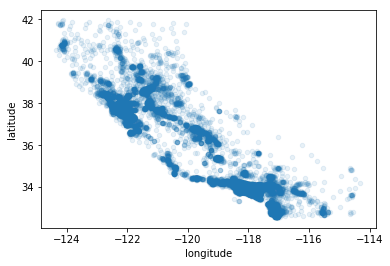

In [9]:
housing1.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

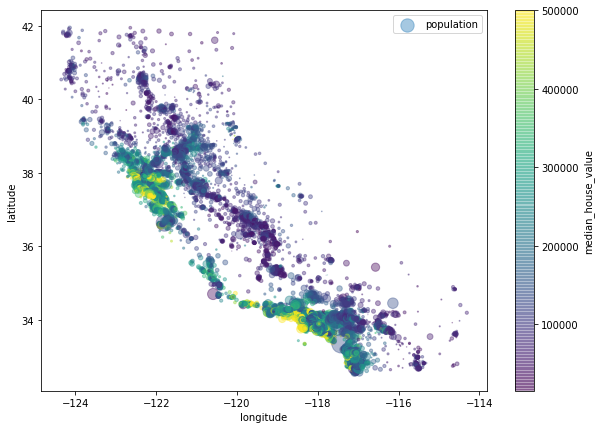

In [52]:
housing1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value",colormap='viridis', colorbar=True,
    sharex=False)

In [10]:
corr_matrix = housing1.corr()

In [11]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


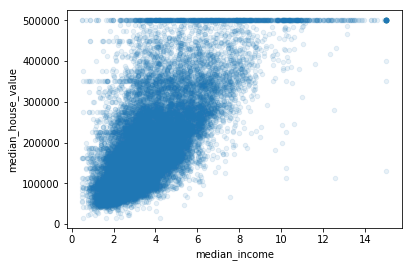

In [12]:
housing1.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

## Attributes Combinations

In [13]:
housing1["rooms_per_household"] = housing1["total_rooms"]/housing1["households"]
housing1["bedrooms_per_room"] = housing1["total_bedrooms"]/housing1["total_rooms"]
housing1["population_per_household"]=housing1["population"]/housing1["households"]

In [14]:
housing1.shape

(20640, 13)

In [15]:
housing1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


# Prepare the data for Machine Learning algorithms

## 1. Data Cleaning

### Handling missing values in "total_bedrooms" column:
    1. Get rid of the corresponding districts.
    2. Get rid of the whole attribute.
    3. Set the values to some value (zero, mean and the median etc.)

In [16]:
housing_features = housing1.drop('median_house_value', axis = 1)
print(housing_features.columns)
housing_features.head()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467


In [17]:
housing_target = housing1['median_house_value']
housing_target.shape

(20640,)

In [18]:
housing1 = housing1.drop("median_house_value", axis=1)
housing1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [19]:
housing1.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [63]:
# housing1.dropna()                                                                 # method 1
# housing1.drop("total_bedrooms", axis = 1)                                         # method 2
# housing1['total_bedrooms'].fillna(housing1['total_bedrooms'].median(), inplace = True)   # method 3

In [22]:
# scikit learn provides a handy class to take care of missing values: SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [23]:
housing_num = housing1.drop("ocean_proximity", axis=1)
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [24]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [25]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [26]:
transformed_values = imputer.transform(housing_num)
transformed_values

array([[-122.23      ,   37.88      ,   41.        , ...,    6.98412698,
           0.14659091,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    6.23813708,
           0.15579659,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    8.28813559,
           0.12951602,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    5.20554273,
           0.21517303,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    5.32951289,
           0.21989247,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    5.25471698,
           0.22118492,    2.61698113]])

In [27]:
housing_transformed = pd.DataFrame(transformed_values)
housing_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467


In [28]:
housing_transformed.columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
housing_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467


In [29]:
housing_transformed.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

### 2. Handling Text and Categorical attributes

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
cat_encoder = OneHotEncoder()

In [32]:
housing_cat = housing[['ocean_proximity']]

In [33]:
dummy_values=cat_encoder.fit_transform(housing_cat)
dummy_values

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [34]:
dummy_values.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
housing_cat = pd.DataFrame(dummy_values.toarray())
housing_cat.head()

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [37]:
housing_cat.columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [38]:
housing_cat.head(20)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


### 3. Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [41]:
std_scaler.fit(housing_num)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


In [43]:
scaled_values=std_scaler.transform(housing_num)

In [44]:
housing_scaled = pd.DataFrame(scaled_values)

In [43]:
housing_scaled.columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [45]:
housing_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.043300e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.043300e+04,2.064000e+04
mean,-6.527810e-15,1.256263e-15,8.557001e-16,1.475181e-16,2.035816e-16,-6.465442e-17,2.139358e-16,3.734255e-16,2.704111e-16,-1.989958e-16,6.064808e-19
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.207283e+00,-1.274093e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.852319e+00,-1.949575e+00,-2.290000e-01
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.445698e-01,-5.740034e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-3.994496e-01,-6.486829e-01,-6.171062e-02
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-2.332104e-01,-2.441308e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-8.078489e-02,-1.703377e-01,-2.431585e-02
75%,7.784964e-01,9.729566e-01,6.643103e-01,2.348028e-01,2.589843e-01,2.644949e-01,2.758427e-01,4.593063e-01,2.519615e-01,4.619056e-01,2.037453e-02
max,2.625280e+00,2.958068e+00,1.856182e+00,1.681558e+01,1.401871e+01,3.025033e+01,1.460152e+01,5.858286e+00,5.516324e+01,1.357268e+01,1.194191e+02


### 4. Transformations Pipeline

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -1.14993031, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.99038135, -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -1.44586501, -0.02584253],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
         0.03870567, -0.0717345 ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
         0.12050112, -0.09122515],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
         0.14290124, -0.04368215]])

In [49]:
housing_pipeline = pd.DataFrame(housing_num_tr)

In [50]:
housing_pipeline.columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [51]:
housing_pipeline.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.628559,-1.149930,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.990381,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.155620,-1.445865,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.156966,-0.493627,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,-0.707889,-0.085616


In [52]:
housing_pipeline.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-6.527810e-15,1.256263e-15,8.557001e-16,1.475181e-16,-2.823081e-16,-6.465442e-17,2.139358e-16,3.734255e-16,2.704111e-16,-3.880294e-16,6.064808e-19
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.207283e+00,-1.277688e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,-1.852319e+00,-1.957424e+00,-2.290000e-01
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-5.445698e-01,-5.718868e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,-3.994496e-01,-6.452881e-01,-6.171062e-02
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-2.332104e-01,-2.428309e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,-8.078489e-02,-1.694568e-01,-2.431585e-02
75%,7.784964e-01,9.729566e-01,6.643103e-01,2.348028e-01,2.537334e-01,2.644949e-01,2.758427e-01,4.593063e-01,2.519615e-01,4.563910e-01,2.037453e-02
max,2.625280e+00,2.958068e+00,1.856182e+00,1.681558e+01,1.408779e+01,3.025033e+01,1.460152e+01,5.858286e+00,5.516324e+01,1.364099e+01,1.194191e+02


### ColumnTransformer : to apply all the transformation together on the housing dataset

In [53]:
from sklearn.compose import ColumnTransformer

In [54]:
num_attribs = list(housing_num)
print(num_attribs)
cat_attribs = ["ocean_proximity"]
print(cat_attribs)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
['ocean_proximity']


In [55]:
housing_features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [56]:
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing_features)

In [57]:
housing_prepared = pd.DataFrame(housing_prepared)

In [58]:
housing_prepared.shape

(20640, 16)

In [59]:
housing_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.628559,-1.149930,-0.049597,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.990381,-0.092512,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.155620,-1.445865,-0.025843,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.156966,-0.493627,-0.050329,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,-0.707889,-0.085616,0.0,0.0,0.0,1.0,0.0


In [60]:
housing_prepared.columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms_per_household', 'bedrooms_per_room',
       'population_per_household','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [61]:
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.628559,-1.149930,-0.049597,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.990381,-0.092512,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.155620,-1.445865,-0.025843,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.156966,-0.493627,-0.050329,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,-0.707889,-0.085616,0.0,0.0,0.0,1.0,0.0


## Create a Test Set

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train,y_test = train_test_split(housing_prepared,housing['median_house_value'], test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape

((16512, 16), (4128, 16))

In [65]:
y_train.shape, y_test.shape

((16512,), (4128,))

# Select a model and train it

In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train, y_train)

0.6582199160539229

In [69]:
y_pred_train = lin_reg.predict(X_train)
y_pred_train[:5]

array([181746.54359616, 290558.74973505, 244957.50017771, 146498.51061398,
       163230.42393939])

In [70]:
y_train[:5]

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
lin_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
lin_rmse

67593.20745775253

### Applying Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
tree_reg.score(X_train,y_train)

1.0

In [76]:
tree_preds = tree_reg.predict(X_train)
tree_rmse = np.sqrt(mean_squared_error(y_train,tree_preds))
tree_rmse

0.0

### Better Evaluation using cross validation

In [77]:
from sklearn.model_selection import cross_val_score

In [79]:
scores = cross_val_score(tree_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [80]:
tree_rmse_scores

array([66161.70548952, 71660.76828322, 68608.96927494, 70656.68533462,
       73603.22853928, 68645.61479491, 66487.95878312, 68916.01770171,
       65965.81379302, 70277.88637648])

In [81]:
tree_rmse_scores.mean()

69098.46483708231

In [ ]:
Apply cv on linear model

In [82]:
scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [83]:
lin_rmse_scores

array([65000.67382615, 70960.56056304, 67122.63935124, 66089.63153865,
       68402.54686442, 65266.34735288, 65218.78174481, 68525.46981754,
       72739.87555996, 68957.34111906])

In [84]:
lin_rmse_scores.mean()

67828.38677377408

### Apply Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
rforest_preds = forest_reg.predict(X_train)
rforest_rmse = np.sqrt(mean_squared_error(y_train,rforest_preds))
rforest_rmse

22512.821063966334

### Fine-Tune Model

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [91]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [92]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [93]:
final_model=grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

## Apply Final model on Test Dataset

In [94]:
final_predictions = final_model.predict(X_test)

In [95]:
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

In [96]:
final_rmse

49306.53683833766

END of ML case study

In [ ]:


# Fixing random state for reproducibility
np.random.seed(19680801)



area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

In [98]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(19680801)

In [99]:
N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)

In [106]:
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)

In [152]:
#area1 = np.ma.masked_where(r < r0, area)
#area2 = np.ma.masked_where(r >= r0, area)
#area
#169.82501042365888, 82.73315430661921
print(type(c))
#s=area1[0]
print(x[0])
print(y[0])
print(area1[1])
c1=c[0]

<class 'numpy.ndarray'>
0.6303305735452077
0.7058067976139255
82.73315430661921


IndexError: tuple index out of range

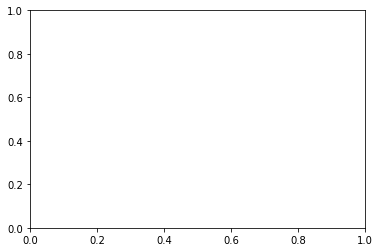

In [153]:
plt.scatter(x[0], y[0], s=area[1], marker='^',c=c1)

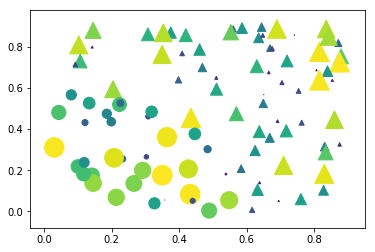

In [110]:
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)

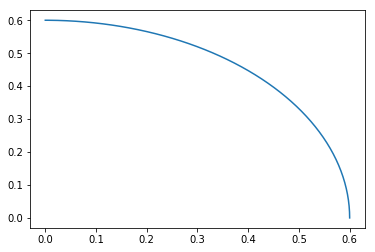

In [111]:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

In [156]:
theta = np.arange(0, np.pi / 2, 0.01)
#np.sin(theta)
theta

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# first define the ratios
r1 = 0.2       # 20%
r2 = r1 + 0.4  # 40%

# define some sizes of the scatter marker
sizes = np.array([60, 80, 120])

# calculate the points of the first pie marker
#
# these are just the origin (0,0) +
# some points on a circle cos,sin
x = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
y = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
xy1 = np.column_stack([x, y])
s1 = np.abs(xy1).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
xy2 = np.column_stack([x, y])
s2 = np.abs(xy2).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
xy3 = np.column_stack([x, y])
s3 = np.abs(xy3).max()

fig, ax = plt.subplots()
ax.scatter(range(3), range(3), marker=xy1,
           s=s1 ** 2 * sizes, facecolor='blue')
ax.scatter(range(3), range(3), marker=xy2,
           s=s2 ** 2 * sizes, facecolor='green')
ax.scatter(range(3), range(3), marker=xy3,
           s=s3 ** 2 * sizes, facecolor='red')

plt.show()